# Solución punto #1 parcial: 

In [5]:
# Librerias 
import pandas as pd 
!pip install matplotlib 
import matplotlib.pyplot as plt 

In [77]:
!pip install seaborn 
import seaborn 

     -------------------------------------- 285.1/285.1 kB 1.3 MB/s eta 0:00:00


## Joint DataFrame: 
1. Leer manualmente el archivo de datos_join.txt, ahí se encuentran tres diccionarios para crear tres DataFrame(DF)

In [6]:
data_1 = {
        'id': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Alex', 'Amy', 'Valentina', 'Alice', 'Lina'], 
        'apellido': ['Anderson', 'Ruales', 'Marin', 'Barbosa', 'Robles']}

data_2 = {
        'id': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Luis', 'Brian', 'Mariana', 'Marcela', 'Carlos'], 
        'apellido': ['Ruiz', 'Giralgo', 'Ortegon', 'Palacios', 'Gallego']}

data_3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

2. Crear 3 DF con los anteriores diccionarios y asignarlos a tres variables. 

In [7]:
data1 = pd.DataFrame(data_1) 
data2 = pd.DataFrame(data_2)
data3 = pd.DataFrame(data_3)
data3

,id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


3. Unir dos DF a lo largo de filas y asignar todos los datos. 

In [8]:
dfjoin_filas = pd.concat([data1,data2],axis=1).reset_index() 
dfjoinF = dfjoin_filas.drop(columns='index')
dfjoinF

,id,primer_nombre,apellido,id,primer_nombre,apellido
0,1,Alex,Anderson,4,Luis,Ruiz
1,2,Amy,Ruales,5,Brian,Giralgo
2,3,Valentina,Marin,6,Mariana,Ortegon
3,4,Alice,Barbosa,7,Marcela,Palacios
4,5,Lina,Robles,8,Carlos,Gallego


4. Unir dos DF a lo largo de columnas y asignar todos los datos de las columnas. 

In [9]:
dfjoin_columnas = pd.concat([data1,data2],axis=0).reset_index() 
dfjoinC = dfjoin_columnas.drop(columns='index')
dfjoinC

,id,primer_nombre,apellido
0,1,Alex,Anderson
1,2,Amy,Ruales
2,3,Valentina,Marin
3,4,Alice,Barbosa
4,5,Lina,Robles
5,4,Luis,Ruiz
6,5,Brian,Giralgo
7,6,Mariana,Ortegon
8,7,Marcela,Palacios
9,8,Carlos,Gallego


5. Hacer un merge para todos los datos y el tercer DF con el valor id 

In [10]:
a1 = pd.merge(dfjoin_columnas, data3, how="outer")
a1 = a1.drop(columns="index")
a1

,id,primer_nombre,apellido,test_id
0,1,Alex,Anderson,51.0
1,2,Amy,Ruales,15.0
2,3,Valentina,Marin,15.0
3,4,Alice,Barbosa,61.0
4,4,Luis,Ruiz,61.0
5,5,Lina,Robles,16.0
6,5,Brian,Giralgo,16.0
7,6,Mariana,Ortegon,NaN
8,7,Marcela,Palacios,14.0
9,8,Carlos,Gallego,15.0


6. Hacer un Merge para los datos que tienen el mismo ID

In [11]:
a2 = pd.merge(dfjoin_columnas, data3, how="inner")
a2 = a2.drop(columns='index')
a2

,id,primer_nombre,apellido,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ruales,15
2,3,Valentina,Marin,15
3,4,Alice,Barbosa,61
4,4,Luis,Ruiz,61
5,5,Lina,Robles,16
6,5,Brian,Giralgo,16
7,7,Marcela,Palacios,14
8,8,Carlos,Gallego,15


# GroupBy 

1. Leer los archivos datos_alcohol.txt que se encuentra en la carpeta data

In [12]:
dfA = pd.read_csv("../data/datos_alcohol.txt", sep=",", index_col=False) 
dfA 

,pais,porciones_cerveza,porciones_licor,porciones_vino,litros_totales_de_alcohol_puro,continente
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


2. ¿Qué continenente toma más cerveza en promedio?

$\textbf{R:}$ El continente que consume más cerveza en promedio es EU mientras que el más bajo AS. 

In [13]:
# Creo un DF que contiene las cervezas y el continente
CC = dfA[["porciones_cerveza", "continente"]]
CC = CC.groupby(by = "continente").mean()
CC.tail()

,porciones_cerveza
continente,
AF,61.471698
AS,37.045455
EU,193.777778
OC,89.687500
SA,175.083333


3. Analizar la columna de vino e imprimir un análisis básico estadistico del consumo. 

$\textbf{R:}$ El país donde más se toma vino es France. Adicionalmente, el contienente donde más se toma vino EU y donde menos se toma es AS. 

Adicionalmente al final de este punto se imprime el análisis básico estadístico.  


In [14]:
pcv = dfA[["pais", "continente", "porciones_vino"]]
pcv1 = pcv.sort_values("porciones_vino",ascending=True)
pcv1 


,pais,continente,porciones_vino
0,Afghanistan,AS,0
27,Burundi,AF,0
116,Myanmar,AS,0
107,Mauritania,AF,0
106,Marshall Islands,OC,0
...,...,...,...
48,Denmark,EU,278
166,Switzerland,EU,280
3,Andorra,EU,312
136,Portugal,EU,339


In [15]:
pcv2 = pcv.groupby(by = "continente").mean()
pcv2

,porciones_vino
continente,
AF,16.264151
AS,9.068182
EU,142.222222
OC,35.625000
SA,62.416667


In [17]:
pcv3 = pcv["porciones_vino"].describe()
pcv3

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: porciones_vino, dtype: float64

4. Para cada continente imprime los valores medio, mínimo y máximo para el consumo de licor.

In [29]:
pca = dfA[["continente", "porciones_licor"]]
pca.head()

,continente,porciones_licor
0,AS,0
1,EU,132
2,AF,0
3,EU,138
4,AF,57


In [28]:
pca1 = pca.groupby(by = "continente").mean()  
pca1 = pca1.rename(columns={'porciones_licor':'mean_porciones_licor'})
pca1

,mean_porciones_licor
continente,
AF,16.339623
AS,60.840909
EU,132.555556
OC,58.437500
SA,114.750000


In [30]:
pca2 = pca.groupby(by = "continente").min() 
pca2 =  pca2.rename(columns={'porciones_licor':'min_porciones_licor'})
pca2


,min_porciones_licor
continente,
AF,0
AS,0
EU,0
OC,0
SA,25


In [31]:
pca3 = pca.groupby(by = "continente").max()
pca3 =  pca3.rename(columns={'porciones_licor':'max_porciones_licor'})
pca3

,max_porciones_licor
continente,
AF,152
AS,326
EU,373
OC,254
SA,302


In [33]:
pca_fini = pd.concat([pca1,pca2,pca3],axis=1).reset_index() 
pca_fini

,continente,mean_porciones_licor,min_porciones_licor,max_porciones_licor
0,AF,16.339623,0,152
1,AS,60.840909,0,326
2,EU,132.555556,0,373
3,OC,58.437500,0,254
4,SA,114.750000,25,302


5. Para cada continente imprime el consumo medio de Alcohol para todas las columnas. 

$\textbf{R:}$ El continente más alcohólico en todos los sentidos es EU. 

In [36]:
newDf = dfA.drop(columns="pais")
newDf = newDf.groupby(by = "continente").mean() 
newDf

,porciones_cerveza,porciones_licor,porciones_vino,litros_totales_de_alcohol_puro
continente,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


## Visualización: 

1. Leer los archivos visualizacion.txt que se encuentran en la carpeta data
2. También se elimina la columna de index porque aparece unos datos de 'Unnamed: 0', los cuales solo sirven para enumerar. 

In [39]:
vs = pd.read_csv("../data/visulualizacion.txt", sep=",", index_col=False) 
vs = vs.drop(columns='Unnamed: 0')
vs

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


3. Realizar el histograma de la columna total_bill 

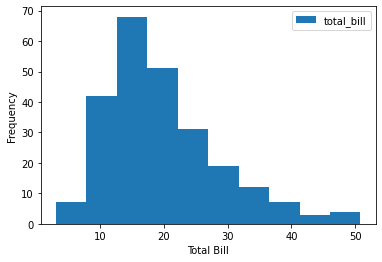

In [45]:
vs.total_bill.plot(kind="hist")
plt.xlabel('Total Bill')  
plt.legend()

4. Crear un Scatter plot presentando la relacion entre total_bill y tip. 

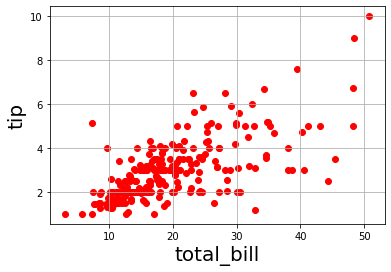

In [56]:
plt.scatter(vs.total_bill, vs.tip, color='red')
plt.xlabel('total_bill',fontsize=20)
plt.ylabel('tip',fontsize=20)
plt.grid()

5. Presentar una relación entre los valores de los days y total_bill.

In [66]:
n1 = vs[["total_bill","day"]] # filtro datos
n2 = n1.groupby(by = "day").mean()
n2 = n2.rename(columns={'total_bill':'mean_total_bill'}) 
n2 

,mean_total_bill
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


<AxesSubplot: title={'center': 'total_bill'}, xlabel='day'>

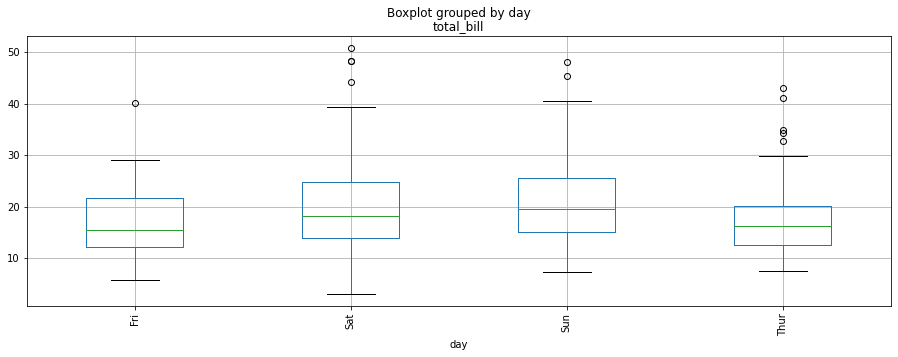

In [67]:
n1.boxplot("total_bill", by="day", figsize=(15,5), rot=90)

6. Cree un bax plot que presente el total_bill por día diferenciando la hora (Cena o Almuerzo)

In [69]:
p1 = vs[["total_bill","day", "time"]]
p1

,total_bill,day,time
0,16.99,Sun,Dinner
1,10.34,Sun,Dinner
2,21.01,Sun,Dinner
3,23.68,Sun,Dinner
4,24.59,Sun,Dinner
...,...,...,...
239,29.03,Sat,Dinner
240,27.18,Sat,Dinner
241,22.67,Sat,Dinner
242,17.82,Sat,Dinner


<AxesSubplot: xlabel='total_bill', ylabel='day'>

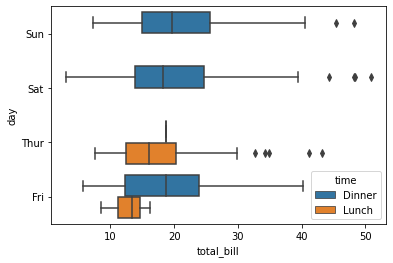

In [85]:
seaborn.boxplot(p1, x='total_bill', y='day', hue='time') 